In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
random.seed(14270788)
import warnings
warnings.filterwarnings('ignore')

In [4]:
music = pd.read_csv('musicData.csv')
music

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.02799999999999,4-Apr,0.330,Hip-Hop
50001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.04299999999999,4-Apr,0.113,Hip-Hop
50002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395,Hip-Hop
50003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,75.88600000000001,4-Apr,0.354,Hip-Hop


# Data cleaning

## Drop Features

For the data cleaning part, I first remove irrelevant features from the dataset, i.e. `instance_id`,`artist_name`,`track_name`,`obtained_date`. `instance_id` is removed because as an identifier column, it does not provide any meaningful information for the genre classification. Similarly, `obtained_date` is dropped. Information in the linguistic properties of artist and song, i.e. `artist_name` and `track_name` are also dropped from my model.

In [5]:
music.drop(['instance_id','artist_name','track_name','obtained_date'], axis=1, inplace=True)

## Check missing values

Then, i check the missing values in the dataset and find that we have 5 rows that all the features are NaNs. Thus, I directly drop these NaN rows, now our dataset has 50,000 obervations in total. 

In [6]:
music.isnull().sum() # check NaNs, we have 5 rows that contains no information, i.e all features are NaN

popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
key                 5
liveness            5
loudness            5
mode                5
speechiness         5
tempo               5
valence             5
music_genre         5
dtype: int64

In [7]:
music[music['popularity'].isnull()]

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
music = music.dropna().reset_index()# drop the NaN rows
music.drop(['index'],axis=1,inplace=True)
print(music.shape)
music.isnull().sum()

(50000, 14)


popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
valence             0
music_genre         0
dtype: int64

## Dummy coded

For the categorical feature `mode`,  since it only has two categories ('Major' and 'Minor'), I use pd.get_dummies() to create two dummy variables, 'mode_Major' and 'mode_Minor'. drop_first is set to True to drop one of the dummy variables to avoid multicollinearity. I use the same one-hot encoding for the categorical feature `key`

In [9]:
mode_dummies = pd.get_dummies(music['mode'], prefix='mode', drop_first=True)
music = pd.concat([music, mode_dummies], axis=1)
music.drop('mode', axis=1, inplace=True)


key_dummies = pd.get_dummies(music['key'], prefix='key', drop_first=True)
music = pd.concat([music, key_dummies], axis=1)

music = music.drop('key', axis=1)

## Convert Genre to Numeric type

Next, I convert the target output `music_genre` to numeric type. Since genre does not have a natural ordering or hierarchy between the categories, I directly use LabelEncoder to assign a unique integer to each category. 

In [10]:
genre = {0:'Alternative',1:'Anime',2:'Blues',3:'Classical',4:'Country',5:'Electronic',6:'Hip-Hop',7:'Jazz',8:'Rap',9:'Rock'}

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
music['music_genre'] = le.fit_transform(music['music_genre'])

In [12]:
le.classes_

array(['Alternative', 'Anime', 'Blues', 'Classical', 'Country',
       'Electronic', 'Hip-Hop', 'Jazz', 'Rap', 'Rock'], dtype=object)

# Test and Split

 Then, I split the data into training and testing sets before imputing missing values(invalid values). This is because imputing missing values before splitting the data can lead to data leakage, where information from the testing set is used to impute missing values in the training set, which can artificially inflate the performance of the model during evaluation. Based on the instruction, for *each* genre, I use 500 randomly picked songs for the test set and the other 4500 songs from that genre for the training set. 

In [13]:
groups = music.groupby('music_genre')

train_set = pd.DataFrame()
test_set = pd.DataFrame()

for genre, group in groups:
    test = group.sample(n=500, random_state = 0) #for each genre, sample 500 songs for the test set
    train = group.drop(test.index) #remaining is for the training set
    train_set = pd.concat([train_set, train], axis=0)
    test_set = pd.concat([test_set, test], axis=0)


train_set = train_set.sample(frac=1, random_state=0).reset_index()
train_set.drop(['index'],axis=1,inplace=True)
test_set = test_set.sample(frac=1,random_state=0).reset_index()
test_set.drop(['index'],axis=1,inplace=True)

In [14]:
print(train_set.shape)
print(test_set.shape)

(45000, 24)
(5000, 24)


# Check hidden missing values

I also check the hidden missing values for each feature to see whether their values are within the range. 

In [15]:
# check 'instance_id', -> all unique
#len(music['instance_id'].unique())
#music[(music['popularity'] < 0) | (music['popularity'] > 99)]
#music[(music['acousticness'] < 0) | (music['acousticness'] > 1)]
#music[(music['danceability'] < 0) | (music['danceability'] > 1)]
#music[(music['energy'] < 0) | (music['energy'] > 1)]
#music[(music['instrumentalness'] < 0) | (music['instrumentalness'] > 1)]
music[(music['liveness'] < 0) | (music['liveness'] > 1)]

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#


### duration_ms

In [16]:
# check 'duration_ms', -> all between 0-1
train_set[(train_set['duration_ms'] < 0)]

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#
6,51.0,0.043800,0.7300,-1.0,0.5960,0.000000,0.1380,-6.284,0.0566,82.973,...,0,0,1,0,0,0,0,0,0,0
9,46.0,0.907000,0.2510,-1.0,0.0674,0.822000,0.0928,-22.581,0.0446,133.929,...,0,0,0,0,0,1,0,0,0,0
13,48.0,0.061900,0.4240,-1.0,0.2890,0.000444,0.1040,-12.063,0.0271,77.941,...,0,0,0,0,0,0,1,0,0,0
23,31.0,0.000648,0.4690,-1.0,0.9480,0.000000,0.1140,-5.050,0.1250,?,...,1,0,0,0,0,0,0,0,0,0
33,10.0,0.033500,0.5450,-1.0,0.7640,0.551000,0.0993,-13.051,0.0321,129.016,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44960,49.0,0.993000,0.3400,-1.0,0.0150,0.886000,0.0859,-29.435,0.0436,130.822,...,0,0,0,0,0,0,0,1,0,0
44963,44.0,0.000284,0.3940,-1.0,0.8780,0.000000,0.0583,-3.418,0.0696,176.173,...,0,0,0,1,0,0,0,0,0,0
44971,44.0,0.016200,0.5230,-1.0,0.7930,0.000000,0.0967,-5.491,0.0334,94.95700000000001,...,0,0,0,0,0,0,0,0,1,0
44977,54.0,0.012800,0.6970,-1.0,0.6240,0.000000,0.1770,-4.535,0.0535,132.469,...,0,1,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Box-plot for duration_ms')

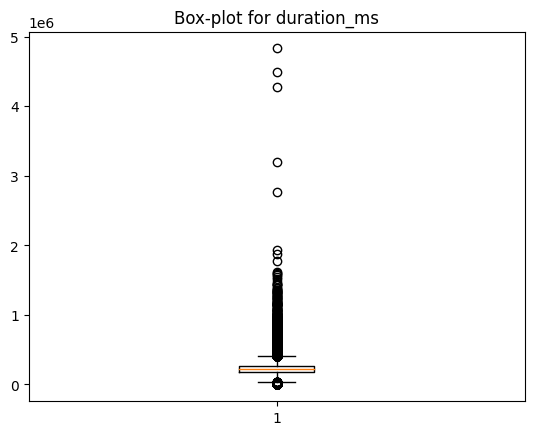

In [17]:
plt.boxplot(train_set['duration_ms']) # outliers, fill with median
plt.title('Box-plot for duration_ms')

For feature `duration_ms`, I find over 4,000 rows with an invalid value of -1. To impute these NaNs, I plot the box-plot of `duration_ms` and find we have a lot of outliers here. Therefore, I decide to use the median to fill the NaN values. In addition, instead of imputing with the overall `duration_ms` median, I fill the NaNs with the median duration of the corresponding genre, i.e. median groupby genre. This strategy leverages the information from the other songs in the same genre to impute a plausible value for the missing data point.




In [18]:
# Fill the NaN values with the median of each genre group
train_set['duration_ms'] = train_set['duration_ms'].replace(-1, np.nan)
genre_duration_median = train_set.groupby('music_genre')['duration_ms'].median() # by group median
for genre in genre_duration_median.index: # fill NA
    train_set.loc[(train_set['music_genre'] == genre) & (train_set['duration_ms'].isnull()), 'duration_ms'] = genre_duration_median[genre]
    
    

## Fill invalid duration for test set

To fill the missing value in testset, I use the median value from the training set to impute. In this way, the imputation is performed based only on the information that the model has learned from the training set, and that the model is evaluated on consistent data.





In [19]:
test_set['duration_ms'] = test_set['duration_ms'].replace(-1, np.nan)
for genre in genre_duration_median.index: # fill NA
    test_set.loc[(test_set['music_genre'] == genre) & (test_set['duration_ms'].isnull()), 'duration_ms'] = genre_duration_median[genre]
    

## tempo

Similarly, I check the feature `tempo` and find over 4,000 rows with an invalid value of '?'. I plot the hisogram of `tempo` and find the distribution is relatively symmetric, thus I use mean groupby genre to impute the the NaNs.

In [20]:
train_set[train_set['tempo'] == '?']

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#
0,55.0,0.106000,0.412,194693.0,0.938,0.000016,0.8570,-2.770,0.1750,?,...,0,1,0,0,0,0,0,0,0,0
23,31.0,0.000648,0.469,238440.0,0.948,0.000000,0.1140,-5.050,0.1250,?,...,1,0,0,0,0,0,0,0,0,0
43,44.0,0.204000,0.313,211626.5,0.613,0.000019,0.1460,-5.726,0.0322,?,...,0,0,1,0,0,0,0,0,0,0
50,64.0,0.001170,0.616,234693.0,0.862,0.000000,0.1790,-5.180,0.0973,?,...,0,0,0,0,0,0,0,0,1,0
77,39.0,0.633000,0.725,267133.0,0.649,0.000013,0.1230,-5.984,0.0325,?,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44984,67.0,0.042600,0.533,219482.0,0.967,0.000432,0.1320,-3.066,0.0570,?,...,0,0,0,1,0,0,0,0,0,0
44985,36.0,0.471000,0.702,147467.0,0.667,0.000000,0.1060,-6.492,0.0391,?,...,1,0,0,0,0,0,0,0,0,0
44987,31.0,0.990000,0.273,412067.0,0.155,0.878000,0.0474,-15.226,0.0399,?,...,0,0,0,0,0,0,0,0,0,0
44994,38.0,0.254000,0.305,392000.0,0.487,0.239000,0.0894,-10.579,0.0292,?,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Histogram for tempo')

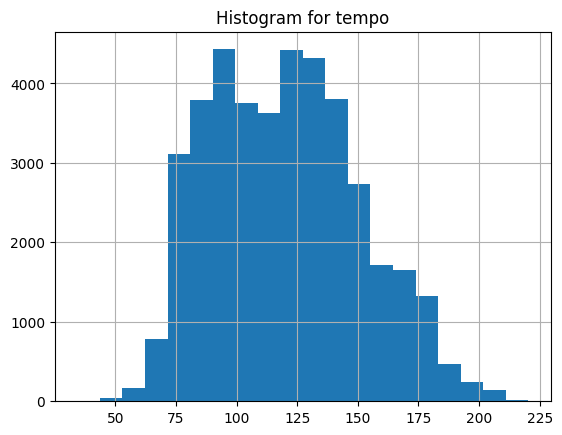

In [21]:
train_set['tempo'] = train_set['tempo'].replace('?', np.nan) # convert "?" to NaN
train_set['tempo'] = train_set['tempo'].astype('float') # convert to float type
train_set['tempo'].hist(bins=20)
plt.title('Histogram for tempo')

In [22]:

# Fill the NaN values with the mean of each genre group
genre_tempo_mean = train_set.groupby('music_genre')['tempo'].mean() # by group median
for genre in genre_tempo_mean.index: # fill NA
    train_set.loc[(train_set['music_genre'] == genre) & (train_set['tempo'].isnull()), 'tempo'] = genre_tempo_mean[genre]
    
    

## Fill invalid tempo for test set

In [23]:
test_set['tempo'] = test_set['tempo'].replace('?', np.nan) # convert "?" to NaN
test_set['tempo'] = test_set['tempo'].astype('float') # convert to float type
for genre in genre_tempo_mean.index: # fill NA
    test_set.loc[(test_set['music_genre'] == genre) & (test_set['tempo'].isnull()), 'tempo'] = genre_tempo_mean[genre]
    

#Data exploration and visualization: 
To understand the distribution and relationships of the features in the dataset, I also plot the histograms for each feature in training set

array([[<Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'duration_ms'}>,
        <Axes: title={'center': 'energy'}>],
       [<Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'tempo'}>],
       [<Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'music_genre'}>,
        <Axes: title={'center': 'mode_Minor'}>,
        <Axes: title={'center': 'key_A#'}>,
        <Axes: title={'center': 'key_B'}>],
       [<Axes: title={'center': 'key_C'}>,
        <Axes: title={'center': 'key_C#'}>,
        <Axes: title={'center': 'key_D'}>,
        <Axes: title={'center': 'key_D#'}>,
        <Axes: title={'center': 'key_E'}>],
       [<Axes: title={'center': 'key_F'}>,
        <Axes: title={'cente

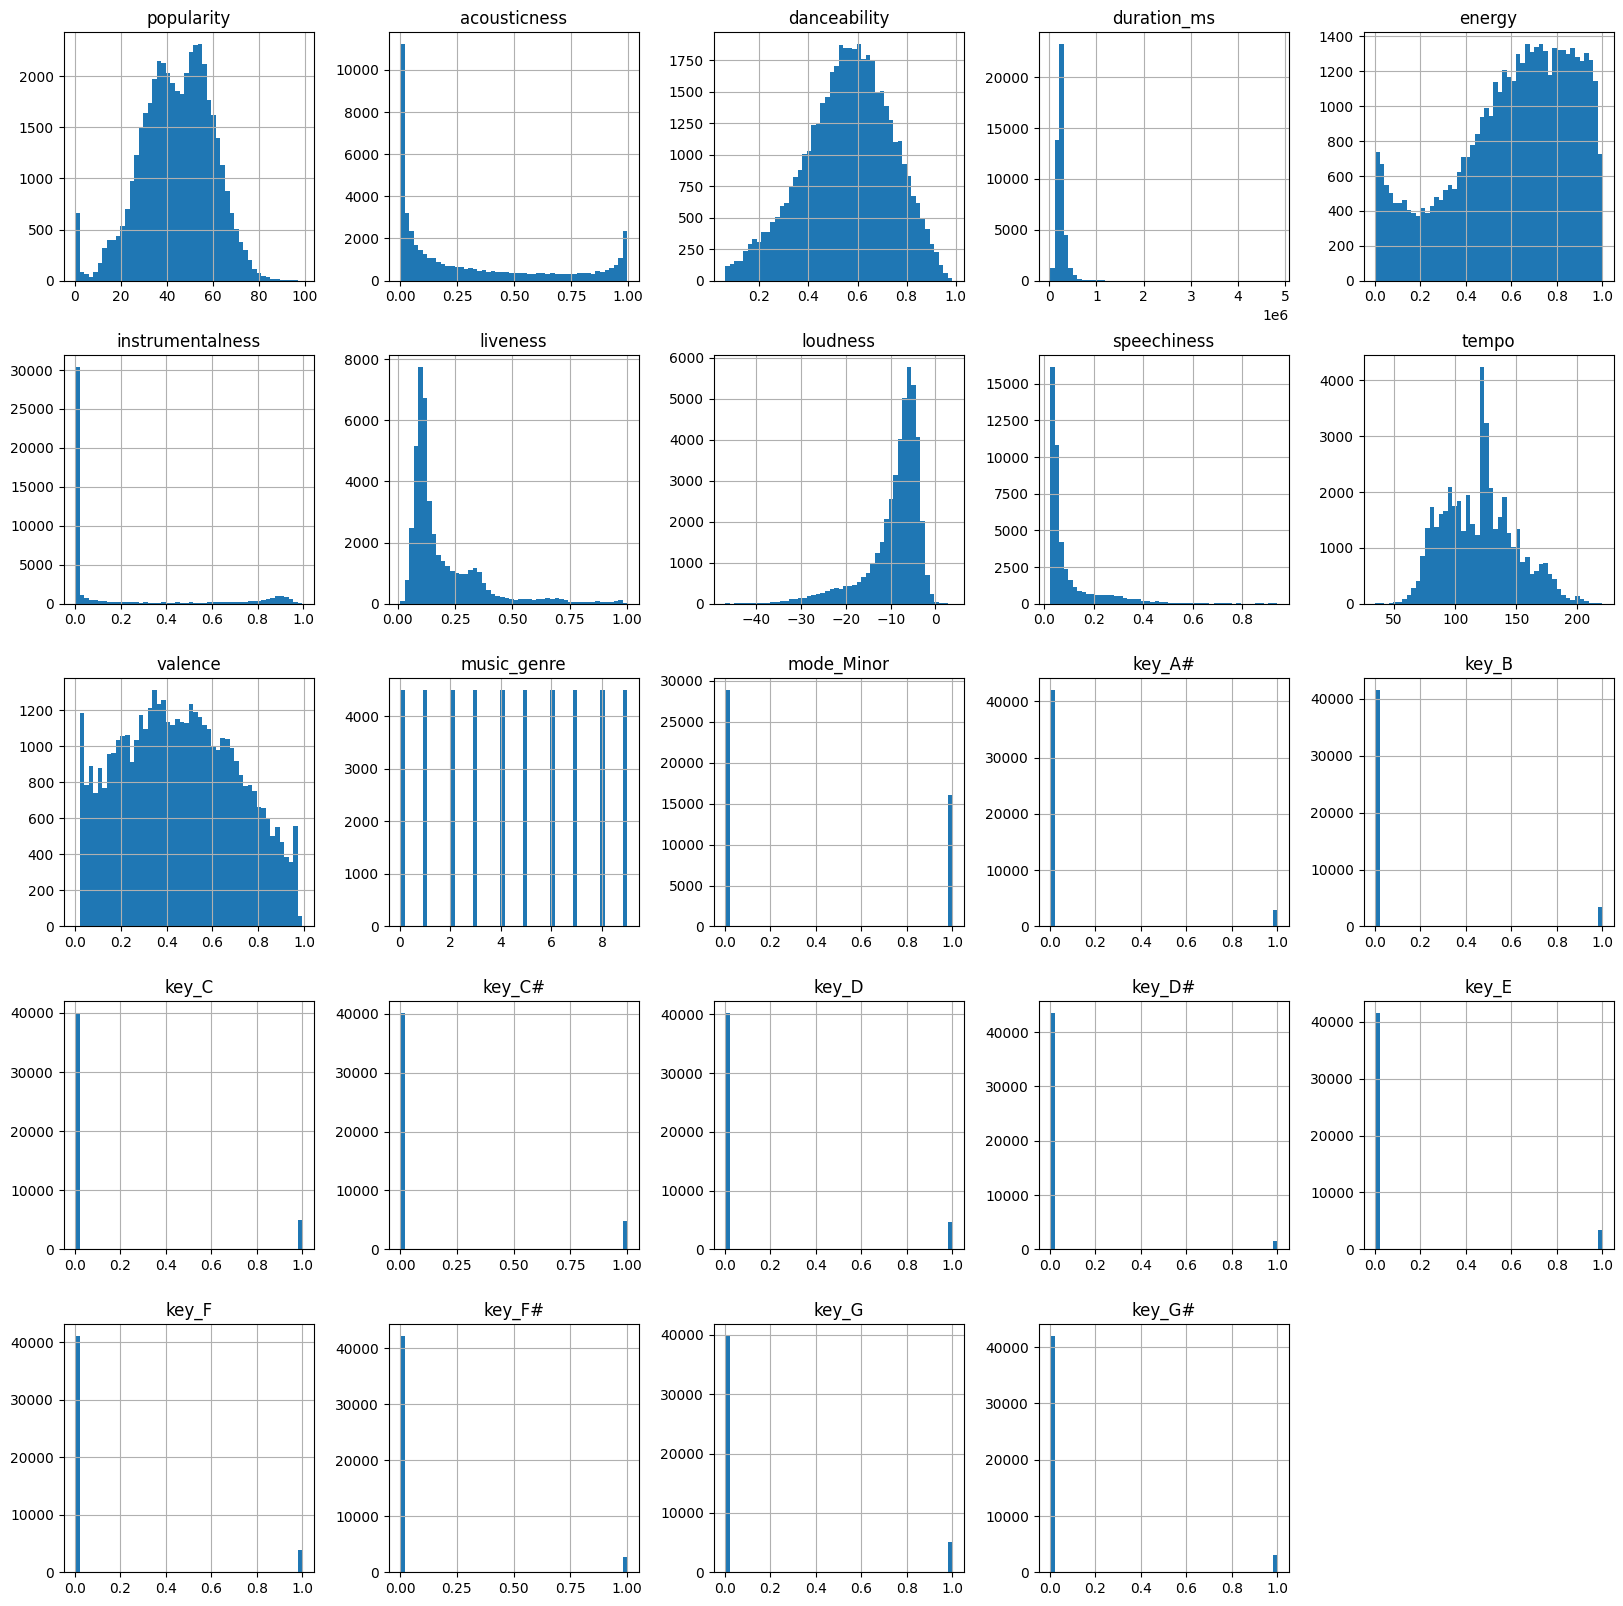

In [24]:
train_set.hist(bins=50,figsize = (20,20))

# Feature scaling:  Standardize or normalize the features

To standardize the data, I calculate the mean and standard deviation of each feature in the training set, and then use those values to standardize both the training and test sets. This helps ensure that the data is standardized consistently across both sets, which is important for building and evaluating accurate machine learning models. Also notice that categorical values should not be normalized as they don't have a meaningful scale, I standardize other numeric features to ensure they have comparable ranges and are not biased by outliers.

In [25]:
# only standardize the numeric feature
numerical_features_train = train_set.select_dtypes(include=[np.float])
categorical_features_train = train_set.select_dtypes(exclude=[np.float])

numerical_features_mean_train = np.mean(numerical_features_train, axis=0)
numerical_features_std_train = np.std(numerical_features_train, axis=0)
numerical_features_norm_train = (numerical_features_train - numerical_features_mean_train) / numerical_features_std_train
num_train = pd.DataFrame(numerical_features_norm_train, columns=numerical_features_train.columns)

# combine standardized numerical features with categorical features
norm_train = pd.concat([numerical_features_norm_train, categorical_features_train], axis=1)

norm_train

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#
0,0.694286,-0.586988,-0.819002,-0.465543,1.280233,-0.558392,4.099515,1.033274,0.802479,0.097447,...,0,1,0,0,0,0,0,0,0,0
1,-1.237155,-0.706860,-0.136334,0.188996,0.856495,-0.558427,1.138083,0.233962,-0.653543,-0.658518,...,0,0,0,0,0,0,0,0,1,0
2,-0.271435,-0.853109,0.104279,0.371333,-0.074213,-0.549711,-0.481740,0.487026,-0.549119,-0.510959,...,1,0,0,0,0,0,0,0,0,0
3,-1.880968,-0.000819,-0.248246,-0.009315,0.364658,-0.555121,0.643481,0.194654,-0.557001,0.277356,...,0,1,0,0,0,0,0,0,0,0
4,-0.722104,1.871992,-0.824598,0.783731,-1.534592,2.171087,-0.265351,-1.553728,-0.616108,0.279241,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,0.501142,-0.866005,0.249766,-0.725054,0.024155,-0.553615,-0.531200,0.661312,-0.243729,0.001002,...,0,0,0,0,1,0,0,0,0,0
44996,0.307998,0.570696,0.663844,-0.668343,0.909463,-0.558441,-0.549747,0.295198,-0.366870,1.029818,...,0,1,0,0,0,0,0,0,0,0
44997,1.080574,1.086525,0.025940,-0.374884,-0.339048,-0.558429,0.686758,0.386645,-0.642707,-0.771080,...,0,0,0,0,0,0,0,0,0,0
44998,0.565523,0.060729,-0.063590,1.317087,0.470592,-0.558437,-0.531200,0.375762,-0.487056,0.013499,...,0,0,0,0,0,0,0,0,0,0


In [26]:
norm_train.columns

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'music_genre', 'mode_Minor', 'key_A#', 'key_B', 'key_C',
       'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F', 'key_F#', 'key_G',
       'key_G#'],
      dtype='object')

## standardize the test set

In [27]:
# only standardize the numeric feature
numerical_features_test = test_set.select_dtypes(include=[np.float])
categorical_features_test= test_set.select_dtypes(exclude=[np.float])

numerical_features_norm_test = (numerical_features_test - numerical_features_mean_train) / numerical_features_std_train
num_test = pd.DataFrame(numerical_features_norm_test, columns=numerical_features_test.columns)

# combine standardized numerical features with categorical features
norm_test = pd.concat([numerical_features_norm_test,  categorical_features_test], axis=1)
norm_test

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#
0,-0.013909,-0.852230,-0.332181,-0.038425,0.867846,-0.558441,-0.722858,0.886438,-0.469324,-1.163095,...,0,0,0,1,0,0,0,0,0,0
1,-0.335816,1.707865,0.568718,0.597905,-0.622801,2.238711,-0.672162,-0.086672,-0.327465,-1.643646,...,0,0,0,0,0,0,0,1,0,0
2,0.951811,-0.632123,1.128282,-0.530289,-0.293648,-0.558430,-0.123153,0.169478,-0.578673,-0.350376,...,0,1,0,0,0,0,0,0,0,0
3,0.436760,0.995669,-0.634346,0.003944,-1.273540,-0.558436,4.167523,-0.510773,-0.672261,-1.469660,...,0,0,0,0,0,0,1,0,0,0
4,-1.687824,1.845615,-1.831814,-0.024676,-0.698468,2.392400,-0.345724,-0.540173,-0.408246,0.006575,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.951811,-0.793320,-1.372971,-0.432727,0.304124,-0.558441,-0.036597,0.583671,-0.543209,-0.452553,...,1,0,0,0,0,0,0,0,0,0
4996,0.758667,0.494494,1.122686,-0.270212,0.137656,-0.558441,0.408545,0.523735,1.295044,-0.690120,...,0,0,0,0,0,0,0,0,0,0
4997,-0.335816,2.018534,-0.069186,-1.573237,-2.230845,2.358588,-0.672780,-3.108008,1.620137,-1.456053,...,0,0,0,0,0,0,0,0,0,0
4998,0.565523,0.547249,0.288935,1.570233,-0.656851,2.066578,-0.531200,-0.390901,0.526643,0.205335,...,0,1,0,0,0,0,0,0,0,0


In [28]:
X_train = norm_train.drop(['music_genre'],axis=1)
y_train = norm_train['music_genre']
X_test = norm_test.drop(['music_genre'],axis=1)
y_test = norm_test['music_genre']
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(45000, 23)
(45000,)
(5000, 23)
(5000,)


# Dimensionality reduction: 

### 1. PCA

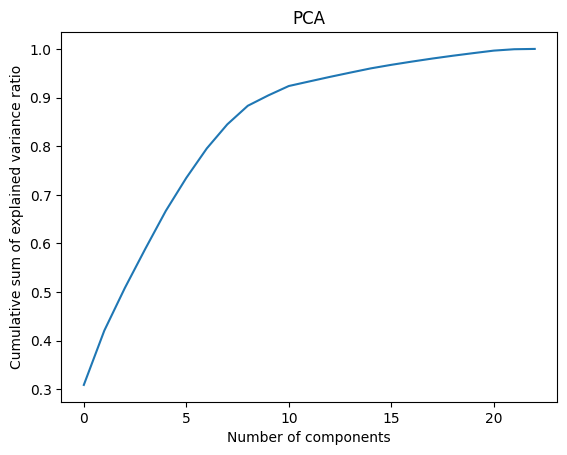

Number of components that explains 90% variance in total: 10


In [29]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)
variance_ratios = pca.explained_variance_ratio_
cumulative_sum = np.cumsum(variance_ratios)

# Plot cumulative sum of explained variance ratio
plt.plot(cumulative_sum)
plt.xlabel('Number of components')
plt.ylabel('Cumulative sum of explained variance ratio')
plt.title('PCA')
plt.show()

# Select number of components that explain a high percentage of the variance
n_components = np.argmax(cumulative_sum >= 0.9) + 1
print('Number of components that explains 90% variance in total:', n_components)


I both apply the PCA tranformation to the training and test set using the same PCA model to ensure that the same principal components are used to transform the data so that the data is consistent and comparable to the transformed training data.



(45000, 10)


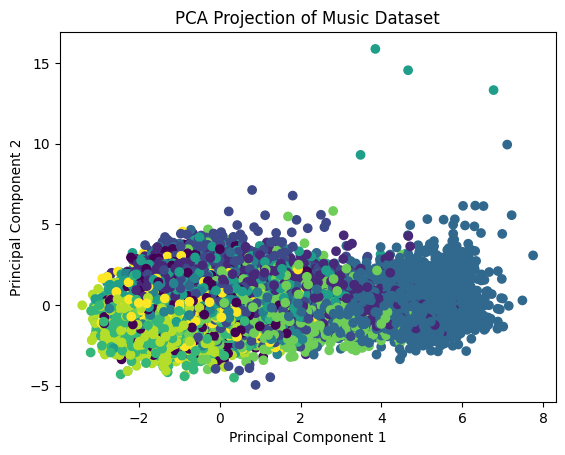

In [30]:
pca = PCA(n_components=10)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
variance_ratios = pca.explained_variance_ratio_

print(X_train_pca.shape)

# Create a scatter plot of the first two principal components, colored by genre
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection of Music Dataset')
plt.show()

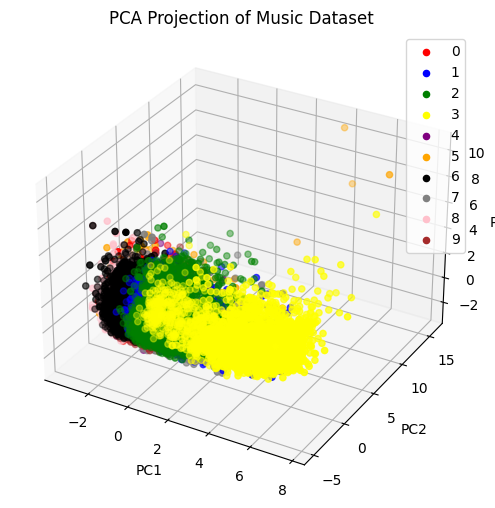

In [31]:
# Create 3D scatter plot of reduced data
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'black', 'grey', 'pink', 'brown']
for i in range(10):  # assuming there are 10 different genres
    ax.scatter(X_train_pca[y_train == i][:, 0], X_train_pca[y_train == i][:, 1], 
               X_train_pca[y_train == i][:, 2], c=colors[i], label=i)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.title('PCA Projection of Music Dataset')
plt.show()

In [32]:
X_train.columns

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'mode_Minor', 'key_A#', 'key_B', 'key_C', 'key_C#', 'key_D',
       'key_D#', 'key_E', 'key_F', 'key_F#', 'key_G', 'key_G#'],
      dtype='object')

Text(0.5, 1.0, 'Principle Component 3:')

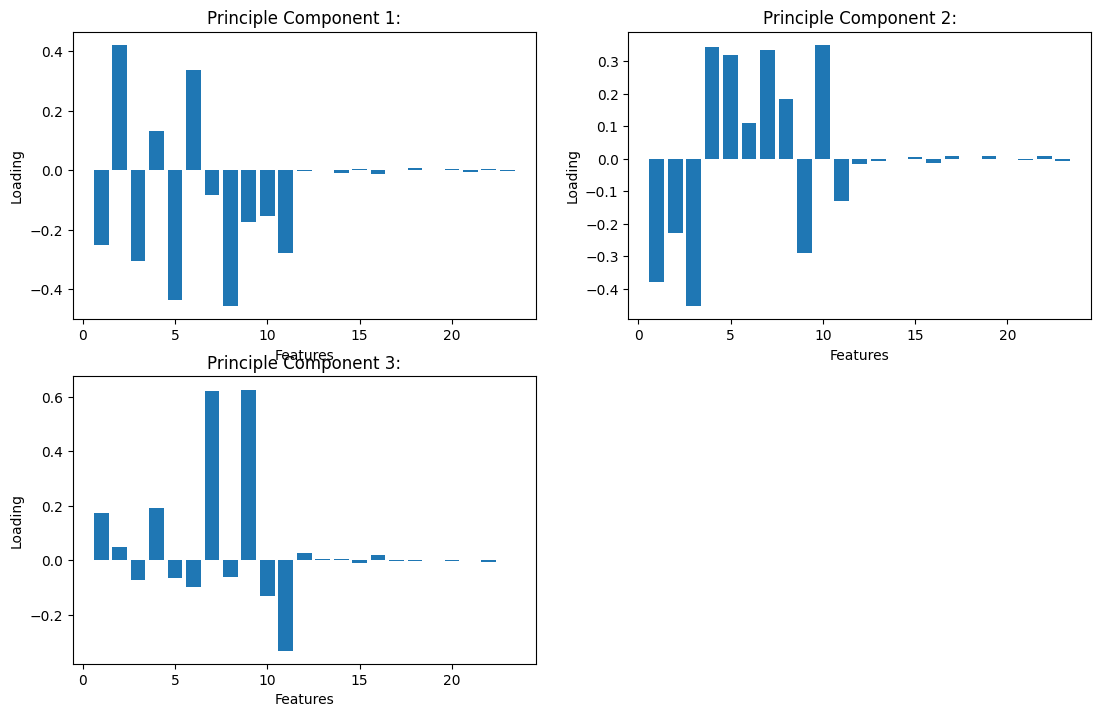

In [33]:
loading11 = pca.components_
numClasses = 23
x = np.linspace(1,numClasses,numClasses)

fig, axs = plt.subplots(figsize=(12, 8))
fig.tight_layout(pad=5.0)

plt.subplot(2,2,1)
plt.bar(x,loading11[0,:]) 
plt.xlabel('Features')
plt.ylabel('Loading')
plt.title("Principle Component 1:") # 2 acousticness, 5 energy, 8 loudness


plt.subplot(2,2,2)
plt.bar(x,loading11[1,:]) 
plt.xlabel('Features')
plt.ylabel('Loading')
plt.title("Principle Component 2:") # 1 popularity, 3 danceability',4 duration_ms,5,7,10 tempo


plt.subplot(2,2,3)
plt.bar(x,loading11[2,:]) 
plt.xlabel('Features')
plt.ylabel('Loading')
plt.title("Principle Component 3:") # 7 liveness, 9 speechiness



## Clustering

The optimal number of clusters is: 2


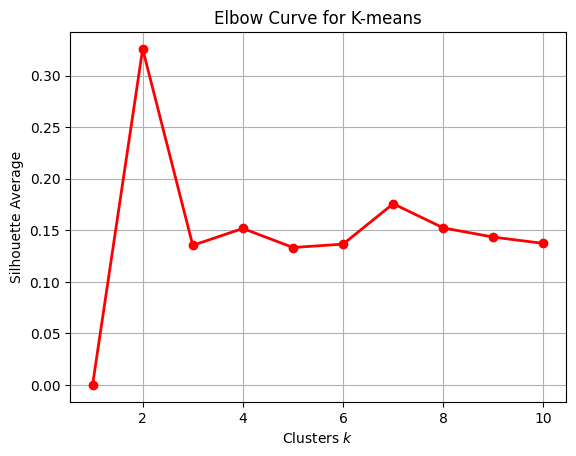

In [34]:
from sklearn import cluster
from sklearn.metrics import silhouette_score

# Silhouette method
max_k = 10
silhouettes = np.zeros(max_k)

for k in range(2, max_k+1):
    kmeans = cluster.KMeans(k, n_init='auto', random_state=0)
    labels = kmeans.fit_predict(X_train_pca)
    silhouettes[k-1] = silhouette_score(X_train_pca, labels)
    
best_k = np.argmax(silhouettes) + 1 
print(f"The optimal number of clusters is: {best_k}")

plt.plot(np.arange(1, max_k+1, 1), silhouettes, 'r-o', lw = 2)
plt.xlabel(r'Clusters $k$')
plt.ylabel(r'Silhouette Average')
plt.title(r'Elbow Curve for K-means')
plt.grid()
plt.show()

Total sum of the distance 220652.5113149177


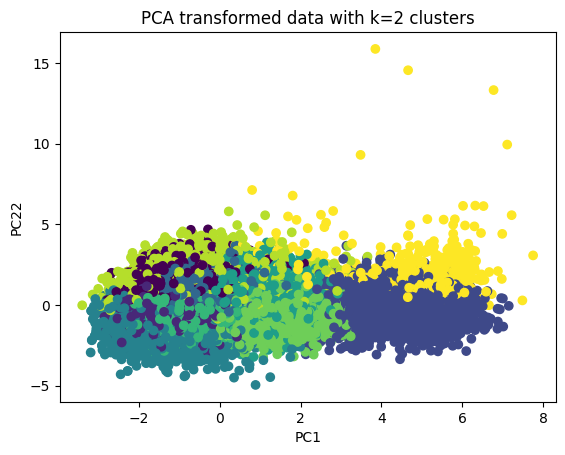

In [38]:
# k-means with k=3
kmeans = cluster.KMeans(n_clusters=10, random_state=0).fit(X_train_pca)
labels = kmeans.fit_predict(X_train_pca)
inertia = kmeans.inertia_

print("Total sum of the distance", inertia)

# Plot the data points colored by their clusters
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=labels)
plt.xlabel("PC1")
plt.ylabel("PC22")
plt.title(f"PCA transformed data with k={best_k} clusters")
plt.show()

## 2. LDA

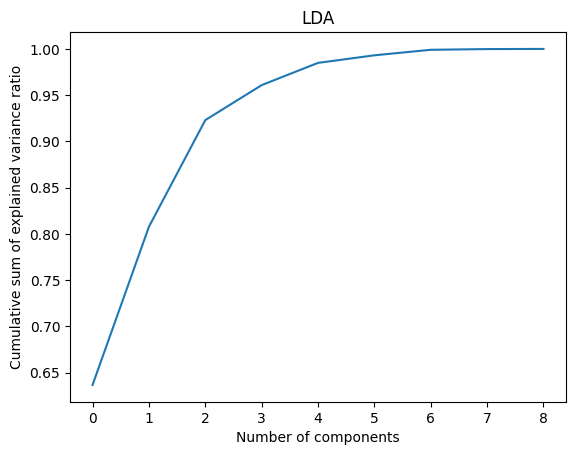

Number of components that explains 90% variance in total: 3


In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA()
X_train_lda = lda.fit_transform(X_train,y_train)

# Calculate explained variance ratio
explained_variances = lda.explained_variance_ratio_
cumulative_sum = np.cumsum(explained_variances)

# Plot cumulative sum of explained variance ratio
plt.plot(cumulative_sum)
plt.xlabel('Number of components')
plt.ylabel('Cumulative sum of explained variance ratio')
plt.title('LDA')
plt.show()

# Select number of components that explain a high percentage of the variance
n_components = np.argmax(cumulative_sum >= 0.9) + 1
print('Number of components that explains 90% variance in total:', n_components)


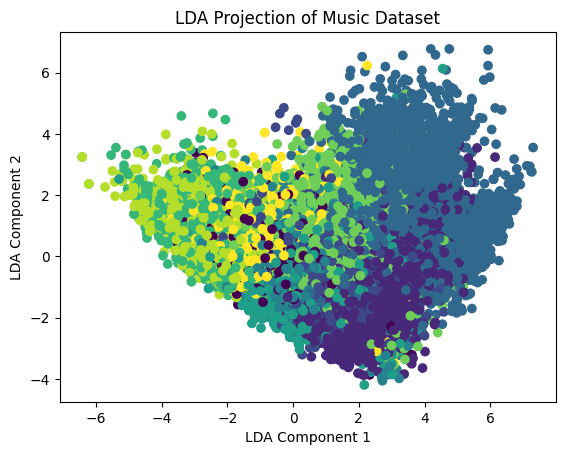

In [37]:
lda = LDA(n_components=3)
lda.fit(X_train, y_train)
X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)

# Plot the scatter graph with LDA projection
plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train)
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA Projection of Music Dataset')
plt.show()

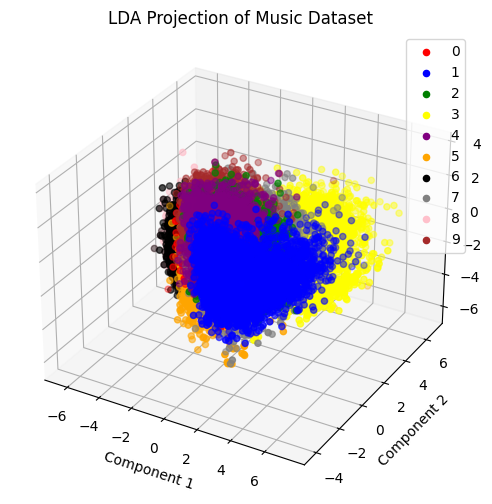

In [ ]:
# Create 3D scatter plot of reduced data
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'black', 'grey', 'pink', 'brown']
for i in range(10):  # assuming there are 10 different genres
    ax.scatter(X_train_lda[y_train == i][:, 0], X_train_lda[y_train == i][:, 1], 
               X_train_lda[y_train == i][:, 2], c=colors[i], label=i)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.legend()
plt.title('LDA Projection of Music Dataset')
plt.show()

# Build Model

## Logstic Regression

In [42]:
evaluation_PCA = pd.DataFrame(columns=['Model','Accuracy','AUC'])
evaluation_LDA = pd.DataFrame(columns=['Model','Accuracy','AUC'])
evaluation_raw= pd.DataFrame(columns=['Model','Accuracy','AUC'])

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

# Train a logistic regression model on the training data
clf = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

# Evaluate accuracy and AUC on the test data
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

print('Accuracy:', accuracy)
print('AUC:', auc)

evaluation_raw.loc[0,['Model','Accuracy','AUC']] = ['Raw Logistic Regression',accuracy,auc]

Accuracy: 0.529
AUC: 0.9066826222222224


## SVM

In [56]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score
import numpy as np

# Define the SVM model
svm_model = SVC(kernel='rbf', decision_function_shape='ovr', probability=True)

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Predict the genre labels of the test set
y_pred = svm_model.predict(X_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Calculate the AUC score of the model
y_pred_proba = svm_model.predict_proba(X_test)
auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print("AUC: {:.4f}".format(auc))
evaluation_raw.loc[1,['Model','Accuracy','AUC']] = ['Raw SVM',accuracy,auc]

Accuracy: 57.44%
AUC: 0.9264


## Decision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# Instantiate the decision tree classifier
clf = DecisionTreeClassifier()

# Train the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the accuracy and AUC of the model
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr', average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc:.4f}")
evaluation_raw.loc[2,['Model','Accuracy','AUC']] = ['Raw Decision Tree',accuracy,auc]

Accuracy: 0.4632
AUC: 0.7052


## Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# Define the model and its parameters
rfc = RandomForestClassifier(n_estimators=100)

# Fit the model on the training data
rfc.fit(X_train, y_train)

# Predict on the test data
y_pred = rfc.predict(X_test)

# Evaluate the model
acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, rfc.predict_proba(X_test), multi_class='ovr')


print("Random Forest Classifier Accuracy:", accuracy)
print("Random Forest Classifier AUC:", auc)
evaluation_raw.loc[3,['Model','Accuracy','AUC']] = ['Raw RandomForest',accuracy,auc]

Random Forest Classifier Accuracy: 0.4632
Random Forest Classifier AUC: 0.921180288888889


## Adaboost

In [59]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, roc_auc_score


clf = AdaBoostClassifier(n_estimators=100)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)


acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba, multi_class='ovr')

print("Accuracy:", acc)
print("AUC Score:", auc)
evaluation_raw.loc[4,['Model','Accuracy','AUC']] = ['Raw Adaboost',acc,auc]

Accuracy: 0.4848
AUC Score: 0.8456715111111113


In [61]:
evaluation_raw

,Model,Accuracy,AUC
0,Raw Logistic Regression,0.529,0.906683
1,Raw SVM,0.5744,0.926424
2,Raw Decision Tree,0.4632,0.705212
3,Raw RandomForest,0.4632,0.92118
4,Raw Adaboost,0.4848,0.845672


In [65]:
evaluation = pd.concat([evaluation_raw,evaluation_PCA,evaluation_LDA],axis=0)
evaluation 

,Model,Accuracy,AUC
0,Raw Logistic Regression,0.529,0.906683
1,Raw SVM,0.5744,0.926424
2,Raw Decision Tree,0.4632,0.705212
3,Raw RandomForest,0.4632,0.92118
4,Raw Adaboost,0.4848,0.845672
0,PCA Logistic Regression,0.5256,0.905263
1,PCA SVM,0.5778,0.925473
2,PCA Decision Tree,0.393,0.665178
3,PCA RandomForest,0.393,0.90301
4,PCA Adaboost,0.4462,0.779276


In [63]:
evaluation[evaluation['AUC'] == evaluation['AUC'].max()]

,Model,Accuracy,AUC
1,Raw SVM,0.5744,0.926424


In [64]:
import plotly.express as px
fig = px.bar(data_frame = evaluation ,
             x = "Model",
             y = 'AUC',
             text_auto=True,
             title = "<b>AUC</b>",width=800, height=500)

fig.update_layout(bargap = 0,
                  title_x = 0.45,
                  title_font = dict(size = 15),
                  uniformtext_minsize = 15,
                  margin=dict(l=20, r=20, t=30, b=15))
fig.update_traces(width=0.8)
fig.show()

In [ ]:
import plotly.express as px
fig = px.bar(data_frame = evaluation ,
             x = "Model",
             y = 'AUC',
             text_auto=True,
             title = "<b>AUC</b>",width=800, height=500)

fig.update_layout(bargap = 0,
                  title_x = 0.45,
                  title_font = dict(size = 15),
                  uniformtext_minsize = 15,
                  margin=dict(l=20, r=20, t=30, b=15))
fig.update_traces(width=0.8)
fig.show()

# Plot AUC with best model

In [ ]:
# Define the SVM model
svm_model = SVC(kernel='rbf', decision_function_shape='ovr', probability=True)

# Fit the model on the training data
svm_model.fit(X_train_pca, y_train)

# Predict the genre labels of the test set
y_pred = svm_model.predict(X_test_pca)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Calculate the AUC score of the model
y_pred_proba = svm_model.predict_proba(X_test_pca)
auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print("AUC: {:.4f}".format(auc))

Accuracy: 57.78%
AUC: 0.9255


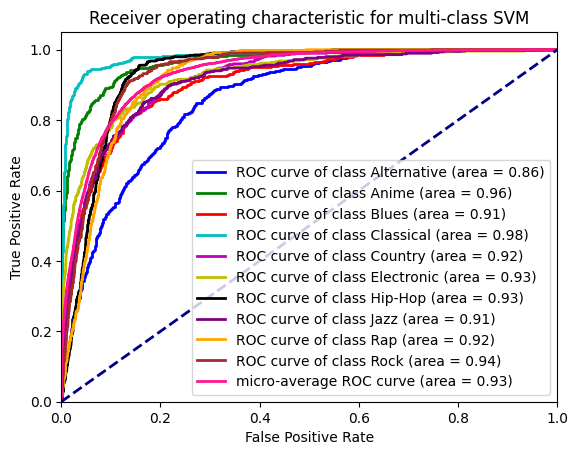

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]).ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure()
lw = 2
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple', 'orange', 'brown']
for i, color in zip(range(10), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(genre[i], roc_auc[i]))
plt.plot(fpr["micro"], tpr["micro"], color='deeppink', lw=lw,
         label='micro-average ROC curve (area = {0:0.2f})'
         ''.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class SVM')
plt.legend(loc="lower right")
plt.show()